In [1]:
import tensorflow as tf
from tensorflow import keras
import resnet_V2
import matplotlib.pyplot as plt
from tqdm import tqdm
import data_util

In [2]:
input_size = 256
batch_size = 32

drop_ae = resnet_V2.ResNetAE(drop_out=0.5)
ae = resnet_V2.ResNetAE(drop_out=0.5)

In [8]:
temp_input = tf.random.normal(shape=(1, 256, 256, 3))
drop_ae(temp_input)
ae(temp_input)
print('good')

<tf.Tensor: shape=(1, 256, 256, 3), dtype=float32, numpy=
array([[[[7.93132186e-03, 7.09375918e-01, 9.92434025e-01],
         [8.84102285e-01, 2.62004375e-01, 9.99612331e-01],
         [5.35397157e-05, 5.36016703e-01, 8.65548611e-01],
         ...,
         [1.19465585e-06, 1.04472041e-03, 9.94453907e-01],
         [3.70452367e-12, 7.53861666e-03, 3.82903781e-05],
         [4.78854775e-03, 3.84127191e-07, 2.55922675e-02]],

        [[5.68774343e-03, 2.42479861e-01, 9.99875903e-01],
         [8.32769275e-03, 9.49134111e-01, 9.99960005e-01],
         [1.25535894e-06, 2.38400698e-03, 9.98606563e-01],
         ...,
         [1.83512599e-22, 1.43170357e-04, 2.81846523e-03],
         [1.18402890e-14, 9.93272738e-12, 8.85425777e-08],
         [2.95767988e-09, 2.22326532e-11, 8.96187203e-07]],

        [[2.35287025e-05, 9.91802216e-01, 9.99994993e-01],
         [2.13503838e-04, 1.61299109e-03, 9.99985516e-01],
         [7.15057697e-16, 8.84239793e-01, 9.99748111e-01],
         ...,
         [1

In [9]:
drop_ae.load_weights('pre_trained/dropout_epoch5.data-00000-of-00001')
ae.load_weights('pre_trained/no_dropout_epcoh5.data-00000-of-00001')

OSError: Unable to open file (file signature not found)

In [3]:
train_ds, test_ds = data_util.get_autoencoder_dataset(batch_size=batch_size)

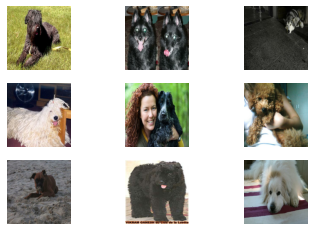

In [4]:
for images in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.axis('off')

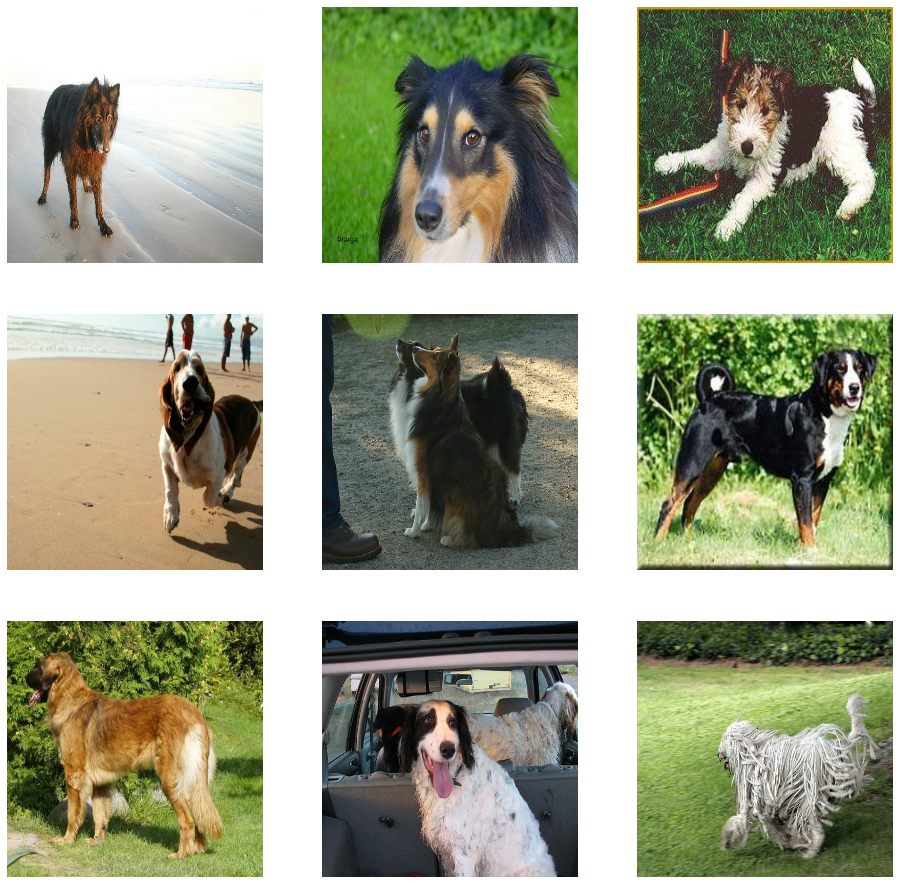

In [6]:
for images in test_ds.take(1):
    plt.figure(figsize=(16, 16))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.axis('off')